<a href="https://colab.research.google.com/github/ddwithlatte/socialgraphs2021/blob/main/Project2_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1——Bank Personal Loan Modelling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import sklearn as sk
sns.set()
import sklearn.linear_model as lm
from sklearn import model_selection, tree

## Task1: Description
**Question**
- Explain what your data is about. I.e. what is the overall problem of
interest?
- Provide a reference to where you obtained the data.
- Summarize previous analysis of the data. (i.e. go through one or two of the original source papers and read what they did to the data and summarize their results).
- You will be asked to apply **(1) classification** and **(2) regression** on your data in the next report. For now, we want you to consider how this should be done. Therefore:
Explain, in the context of your problem of interest, what you hope to accomplish/learn from the data using these techniques?.
Explain which attribute you wish to predict in the regression based on which other attributes? Which class label will you predict based on which other attributes in the classification task?
If you need to transform the data in order to carry out these tasks, explain roughly how you plan to do this.

###Context
Thera Band has increasingly grown a number of customers, but the majority of them are depositors. The bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans.

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success, which motivates the Bank tp rise the convention rate. This dataset is about the campaign, which include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan).


####Reference

This dataset comes from [Kaggle](https://www.kaggle.com/teertha/personal-loan-modeling)


####Summary about previous analysis

- There are no empty or (NaN) values in the dataset.
- All categorical data are represented with numbers
- Some of the predictor variables are heavily skewed (long - tailed)


####Goal

We tend to use classification and regression techniques to predicted whether customers will identify the potential customers who have a higher probability of purchasing the loan. `Personal Loan` is our targeted feature, because it means that customers accept the personal loan or not.

The exploring dataset will follow these procedures:
1. Monitor our data
   Make sure the dataset excludes noise, outliers and missing values
2. Standardization
   Standardize our data to reduce the risk of duplication
3. Delete duplication
   Save time when analyzing data

###Feature Description
Load the Peronal Loan csv data using the Pandas library

In [2]:
filename = 'Bank_Personal_Loan_Modelling.csv'
try:
  loan = pd.read_csv(filename)
except Exception:
  print('No such file on Google Colab. Please upload it first.')
  from google.colab import files #import the files fron colab
  files.upload() #upload the data set file form PC
  loan = pd.read_csv(filename)
loan.head()

No such file on Google Colab. Please upload it first.


Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Feature Description**
- `ID`: Customer ID
- `Age`: Customer’s age in completed years
- `Experience`: years of professional experience
- `Income`: Annual income of the customer (in thousand dollars)
- `ZIP Code`: Home Address ZIP code.
- `Family`: the Family size of the customer
- `CCAvg`: Average spending on credit cards per month (in thousand dollars)
- `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
- `Mortgage`: Value of house mortgage if any. (in thousand dollars)
- `Personal Loan`: Did this customer accept the personal loan offered in the last campaign?
- `Securities Account`: Does the customer have securities account with the bank?
- `CD Account`: Does the customer have a certificate of deposit (CD) account with the bank?
- `Online`: Do customers use internet banking facilities?
- `CreditCard`: Does the customer use a credit card issued by any other Bank?

## Task 2: PCA

- A detailed explanation of the attributes of the data.
  - Describe if the attributes are discrete/continuous, Nominal/Ordinal/Interval/Ratio,
  - Give an account of whether there are data issues (i.e. missing values or corrupted data) and describe them if so.
  If your data set contains many similar attributes, you may restrict yourself to describing a few representative features (apply common sense).

- Tasks from PCA section
  There are three aspects that needs to be described when you carry out thePCA analysis for the report:
  - The amount of variation explained as a function of the number of PCA components included,
  - the principal directions of the considered PCA components (either find a way to plot them or interpret them in terms of the features),
  - the data projected onto the considered principal components.
  If your attributes have different scales you should include the step where the data is standardizes by the standard deviation prior to the PCA analysis.


### Feature catalogue
To begin, run the following cell to load the dataset into this notebook. 
* `loan_features` will contain a numpy array of 13 attributes for 5000 different plants (shape 5000 x 4). 
* `loan_target` is the value in `Personal Loan` column. The class name will be stored in `loan_target_names`.
* `loan_feature_names` will be a list of 13 names, one for each attribute in `loan_features`. 

In [3]:
# Unpacking the data into arrays
loan_features = loan.iloc[:].drop(columns=['Personal Loan'])
loan_target = loan['Personal Loan']
loan_feature_names = loan_features.keys()
loan_target_names = 'Personal Loan'
loan_features

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


**Feature catalogue**
- `ID`: Discrete & Nominal
- `Age`: Discrete & Ratio
- `Experience`: Discrete & Ratio
- `Income`: Discrete & Interval
- `ZIP Code`: Discrete & Nominal
- `Family`: Discrete & Ratio
- `CCAvg`: Continuous & Interval
- `Education`: Discrete & Ratio
- `Mortgage`: Discrete & Nominal
- `Personal Loan`: Discrete & Nominal
- `Securities Account`: Discrete & Nominal
- `CD Account`: Discrete & Nominal
- `Online`: Discrete & Nominal
- `CreditCard`: Discrete & Nominal

### Data cleaning

In [4]:
loan_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


There are no missing value in this dataset.

`Id` column is not needed and can be dropped. Additionally, `ZIP Code` information can be reflected by other features, like `Income`, `Education` and so on.

In [5]:
# Drop ID and ZIP Code
loan_features = loan.drop(columns=['ID', 'ZIP Code'])
loan_feature_names = loan_features.keys()
loan_features.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


**Processing Experience**

In [6]:
loan_features[loan_features['Experience']<0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

52 customers from age group 23 - 30 have negative values in `Experience`

In [7]:
# outlier
loan_clean_feature = loan_features[loan_features['Experience']>=0]
# null value
loan_clean_feature = loan_clean_feature[~loan_clean_feature['Age'].isna()]
loan_clean_feature[~loan_clean_feature.isnull()]
# empty value
loan_clean_feature = loan_clean_feature[loan_clean_feature['Age']!='']
loan_clean_feature

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [8]:
# download clean data
loan_clean_feature.to_csv('loan_clean_feature.csv')

In [9]:
# loan_clean_feature=loan_clean_feature.reset_index()

In [10]:
loan_feature_names = loan_clean_feature.keys()
loan_feature_names

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

### PCA
To apply PCA, we will first need to "center" the data so that the mean of each feature is 0.

Compute the columnwise mean of loan_features in the cell below and store it in loan_mean. Then, subtract loan_mean from loan_features, and save the result in features.

In [11]:
# Calculate the loan_mean and feature
loan_mean = np.mean(loan_clean_feature)
# exclusive_feature = ['Mortgage']
features = (loan_clean_feature - loan_mean)/loan_clean_feature.std().drop(columns=['Personal Loan'])
features.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.815889,-1.708901,-0.538128,1.400615,-0.192211,-1.046676,-0.556172,-0.327733,2.930429,-0.254929,-1.217023,-0.645340
1,-0.049219,-0.117667,-0.863419,0.529872,-0.249429,-1.046676,-0.556172,-0.327733,2.930429,-0.254929,-1.217023,-0.645340
2,-0.579220,-0.471274,-1.362198,-1.211614,-0.535520,-1.046676,-0.556172,-0.327733,-0.341178,-0.254929,-1.217023,-0.645340
3,-0.932554,-1.001686,0.567861,-1.211614,0.437190,0.144162,-0.556172,-0.327733,-0.341178,-0.254929,-1.217023,-0.645340
4,-0.932554,-1.090088,-0.624872,1.400615,-0.535520,0.144162,-0.556172,-0.327733,-0.341178,-0.254929,-1.217023,1.549259
5,-0.755887,-0.648078,-0.971849,1.400615,-0.878830,0.144162,0.965989,-0.327733,-0.341178,-0.254929,0.821511,-0.645340
6,0.657449,0.589549,-0.039349,-0.340871,-0.249429,0.144162,-0.556172,-0.327733,-0.341178,-0.254929,0.821511,-0.645340
7,0.392448,0.324343,-1.123651,-1.211614,-0.936048,1.334999,-0.556172,-0.327733,-0.341178,-0.254929,-1.217023,1.549259
8,-0.932554,-0.913284,0.155826,0.529872,-0.764393,0.144162,0.465149,-0.327733,-0.341178,-0.254929,0.821511,-0.645340
9,-1.020887,-1.001686,2.302745,-1.211614,3.984721,1.334999,-0.556172,3.050648,-0.341178,-0.254929,-1.217023,-0.645340


####SVD
Use the [`np.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) function to compute the SVD of our `features`. Store the left singular vectors, singular values, and right singular vectors in `u`, `s`, and `vt`, respectively.

In [12]:
# SVD
u, s, vt = np.linalg.svd(features, full_matrices=False)
u.shape, s, vt.shape

((4948, 12), array([105.93020161,  98.85003445,  83.97458637,  75.3205588 ,
         70.92545055,  69.77071315,  68.41468129,  67.68209021,
         53.25713503,  46.53787749,  38.17856118,   5.20004183]), (12, 12))

In [13]:
total_variance = np.sum(s**2) / len(loan_clean_feature)
print("total_variance: {:.3f} should approximately equal the sum of the feature variances: {:.3f}"
      .format(total_variance, np.sum(np.var(loan_clean_feature, axis=0))))

total_variance: 11.998 should approximately equal the sum of the feature variances: 12754.800


Variance explained by principal components

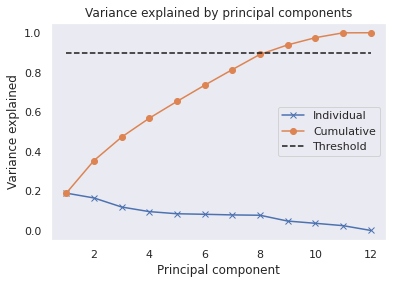

In [14]:
def drawVrancePCA(s):
  # Compute variance explained by principal components
  rho = (s*s) / (s*s).sum()

  threshold = 0.9

  # Plot variance explained
  plt.figure()
  plt.plot(range(1,len(rho)+1),rho,'x-')
  plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
  plt.plot([1,len(rho)],[threshold, threshold],'k--')
  plt.title('Variance explained by principal components');
  plt.xlabel('Principal component');
  plt.ylabel('Variance explained');
  plt.legend(['Individual','Cumulative','Threshold'])
  plt.grid()
  plt.show()
drawVrancePCA(s)

Only use the first two principal components to see what a 2D version of our data looks like.

In [15]:
loan_2d = features @ vt[:2,:].T
loan_2d.info()
# loan_2d

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4948 non-null   float64
 1   1       4948 non-null   float64
dtypes: float64(2)
memory usage: 116.0 KB


#### PCA Figure

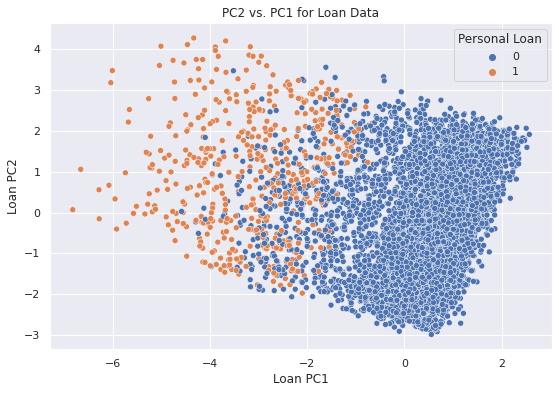

In [16]:
def drawPCA(data):
  plt.figure(figsize=(9, 6))
  plt.title("PC2 vs. PC1 for Loan Data")
  plt.xlabel("Loan PC1")
  plt.ylabel("Loan PC2")
  sns.scatterplot(data = data,x=0, y=1 , hue=loan_target)
drawPCA(loan_2d)

This figure is weird because of the right column, which is caused by `Mortgage` feature. If we exclude `Mortgage` feature, we can get a more clearer figure.

## Task3&4: Basic statistics & Data Visualisation
**Questions**
* Include basic summary statistics of the attributes.   
* Are there issues with outliers in the data,
* Do the attributes appear to be normal distributed,
* Are variables correlated,
* Does the primary machine learning modeling aim appear to be feasible based on your visualizations.

A discussion explaining what you have learned about the data. Summarize here the most important things you have learned about the data and give also your thoughts on whether your primary machine learning aim appears to be feasible based on your visualization.

### Summary statistics

In [17]:
print('Attributes:',loan_feature_names)
print('Num:',len(loan_feature_names))

Attributes: Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')
Num: 12


#### Discrete variables

In [18]:
dis_columns = ['Age', 'Experience', 'Income','CCAvg', 'Mortgage']

In [19]:
loan_clean_feature[dis_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4948.0,45.557195,11.320735,24.0,36.00,46.0,55.0,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.0,43.0
Income,4948.0,73.814470,46.112596,8.0,39.00,64.0,98.0,224.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.70,1.5,2.6,10.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.00,0.0,101.0,635.0


**Observation**<br>
* Costumers aged from 24~67, with a mean of about 45
* Costumers have average 20 years working experience (the longest is 43)
* Income ranged from 8k~224k in US and the average income is around 74k USD
* Mortgage has the most std and the max mortgage is 635 which seems **like a outlier**.
So we dive more into the 635 mortgage item

In [20]:
loan_clean_feature[loan_clean_feature['Mortgage']==635]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2934,37,13,195,2,6.5,1,635,0,0,0,1,0


This guy has a 195k annual income, which means the monthly mortgage is far more than his/her income. **So this item should be dropped.**

In [21]:
loan_clean_feature = loan_clean_feature.drop(index=2934)

**Inspection on the attributes' distribution**

<Figure size 1080x720 with 0 Axes>

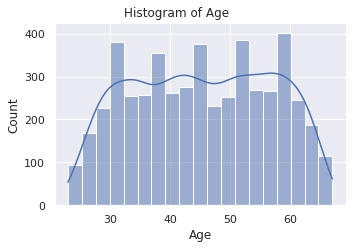

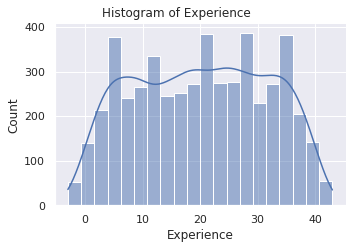

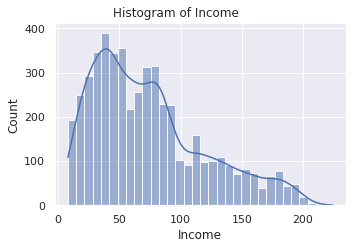

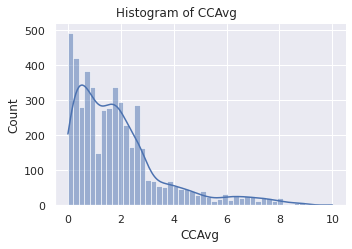

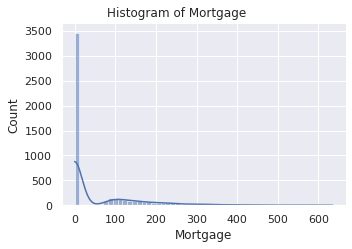

In [22]:
plt.figure(figsize=(15, 10))
for i in range(len(dis_columns)):
    attr = dis_columns[i]
    g = sns.displot(data=loan_features[attr],kind='hist',kde=True)
    g.fig.set_size_inches(5,3)
    g.fig.suptitle("Histogram of " + attr, y = 1.05)

**Observations**
1. __None of these attributes apply with normal distribution__
2. The distributions of Age, Experience are rather even;
3. Costumers who earn below 100k accounts for the most;
4. The CCAvg of applicants is mostly below 4k;
5. A remarkable number of applicants have no mortgage;

#### Multivariate Analysis

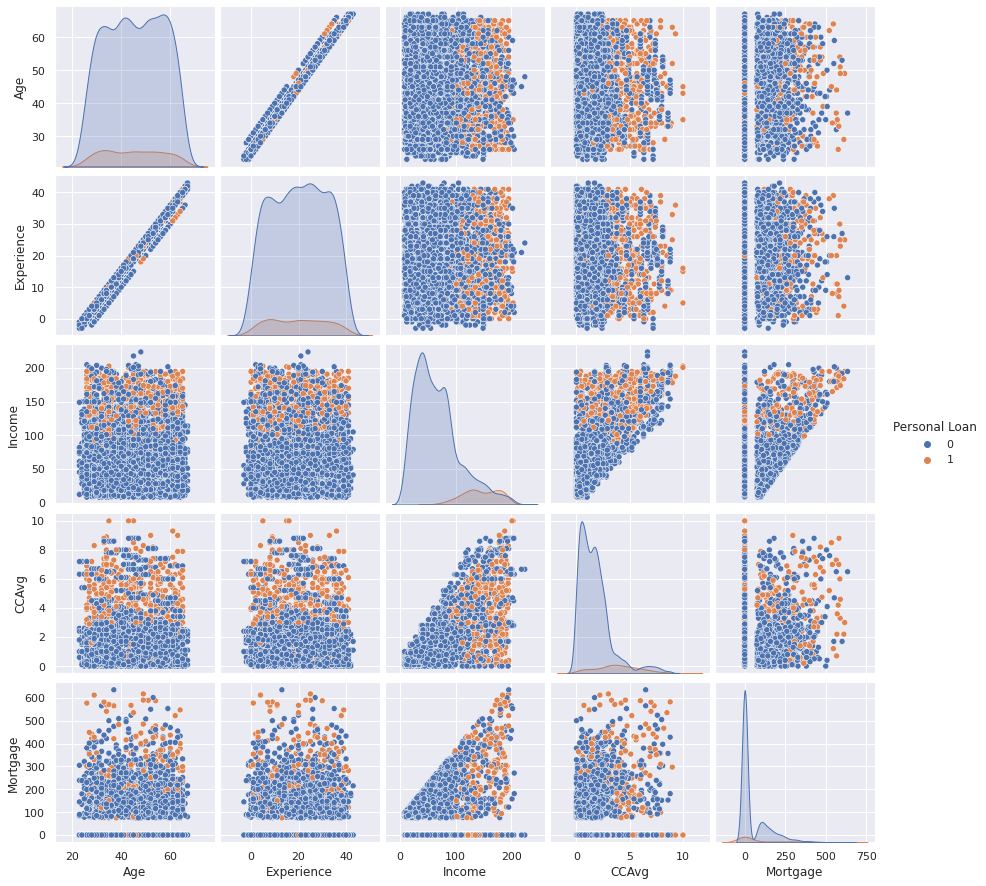

In [23]:
sns.pairplot(loan_features, vars=dis_columns, hue="Personal Loan", height=2.5);

**Observation**
1. Clients with income more than 100k are more likely to get loan
2. Clients with CCAvg(monthly average spending on credit card) more than 4k are more likely to get loan

#### Analysis of Correlation

<function matplotlib.pyplot.show>

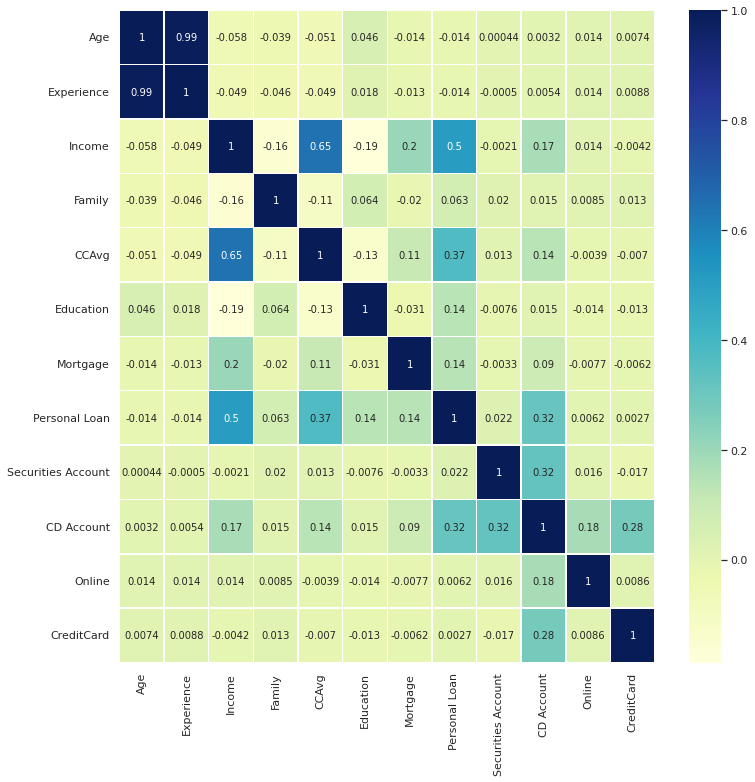

In [24]:
figure, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(loan_clean_feature.corr(),cmap='YlGnBu',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show

**Observation**
* 'Personal Loan' has correlation with 'Income’,'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
* 'Age' and 'Experience' are highly correlated
* 'CCAvg' and 'Income' correlated with each other.
* 'Mortgage' has moderate correlation with 'Income'
* 'Securities Account' has moderate relation with 'CD Acoount'
* 'Education' and 'Income' are negtive correlated which is a bit surprise.


#### Categorical variables

In [25]:
# Categorical variables
cat_columns = ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']

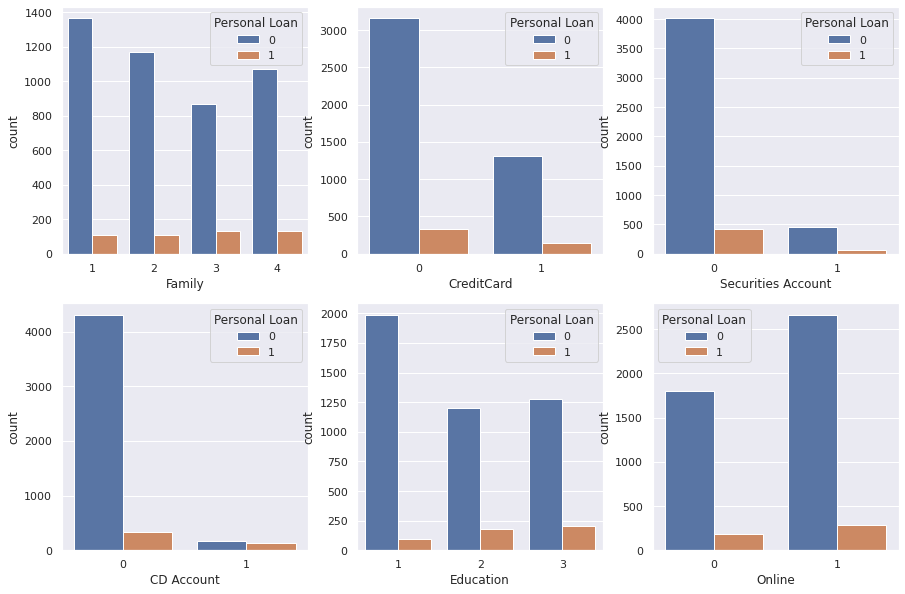

In [26]:
# Show the counts of 'Personal Loan' in each categorical bin using bars. 
f = plt.figure(figsize=(15, 10))
f.add_subplot(2,3,1)
sns.countplot(x='Family', hue = 'Personal Loan', data = loan_clean_feature)
f.add_subplot(2,3,2)
sns.countplot(x='CreditCard', hue = 'Personal Loan', data = loan_clean_feature)
f.add_subplot(2,3,3)
sns.countplot(x='Securities Account', hue = 'Personal Loan', data = loan_clean_feature)
f.add_subplot(2,3,4)
sns.countplot(x='CD Account', hue = 'Personal Loan', data = loan_clean_feature)
f.add_subplot(2,3,5)
sns.countplot(x='Education', hue = 'Personal Loan', data = loan_clean_feature)
f.add_subplot(2,3,6)
sns.countplot(x='Online', hue = 'Personal Loan', data = loan_clean_feature)

**Observation**
1. The number of Family members basically has no effect on personal loan application
2. Costumers with no CreditCards, Securities Account, CD Account are more likely to apply for a personal loan
3. Undergraduates opted to apply personal loan

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

70.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



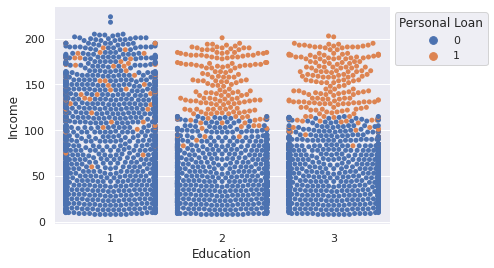

In [27]:
sns.swarmplot(x='Education',y='Income',hue='Personal Loan',data=loan_clean_feature)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
labels=["No","Yes"]
# plt.legend(loc='lower left', frameon=False,)
plt.legend(loc="upper left",title="Personal Loan",bbox_to_anchor=(1,1))
# plt.title()

**Oberservation**   
* People with higher income and education opted for personal loan

## Regression


### Part A:
Based on previous inspection on data, we found that customers opted for accepting personal loan have highest correlation with the amount of their income among all features. At the same time, according to variables' correlation heat map, customer 'Income' highly correlated with continuous variable  'CCAvg'(Average spending on credit card). Hence, we assume that the more money customer earn, the more possible they spend money with credit card. Thus, these customers tend to apply for personal loan.  By regression, we hope to validate this idea.

#### feature transformation

1.Explain what variable is predicted based on which other variables and what you hope to accomplish by the regression. Mention your feature transformation choices such as one-of-K coding. Since we will use regularization momentarily, apply a feature transformation to your data matrix X such that each column has mean 0 and standard deviation 1.

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [29]:
OH_Edu = pd.get_dummies(loan_clean_feature['Education'],prefix='Edu', prefix_sep='_')
# rename its columns
X = loan_clean_feature[['CCAvg','Mortgage','CD Account','Family','Personal Loan']]

# concat X with 'Education' after One-Hot encoding
X = pd.concat([X,OH_Edu],axis=1)
y = loan_clean_feature['Income'].to_numpy()
X

,CCAvg,Mortgage,CD Account,Family,Personal Loan,Edu_1,Edu_2,Edu_3
0,1.6,0,0,4,0,1,0,0
1,1.5,0,0,3,0,1,0,0
2,1.0,0,0,1,0,1,0,0
3,2.7,0,0,1,0,0,1,0
4,1.0,0,0,4,0,0,1,0
...,...,...,...,...,...,...,...,...
4995,1.9,0,0,1,0,0,0,1
4996,0.4,85,0,4,0,1,0,0
4997,0.3,0,0,2,0,0,0,1
4998,0.5,0,0,3,0,0,1,0


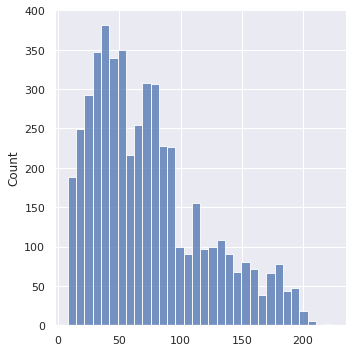

In [30]:
sns.displot(y)

In [31]:
X.shape

(4947, 8)

In [32]:
# Standardization(Standardization is operated on columns)
scaler = StandardScaler()
# Standardization is a column operation. 
# A one-dimensional array has only one value in each column and cannot be calculated.
# The solution is to change one-dimensional array to two-dimensional array through reshape (- 1, 1)
X = scaler.fit_transform(X)
print('1-d array after standarlization X\'s mean:',X.mean())
print('1-d array after standarlization X\'s std:',X.std())

1-d array after standarlization X's mean: 2.0646961444413665e-18
1-d array after standarlization X's std: 1.0


#### Prepare regression models

1. Set regularized Linear regression<br>
We manually choose a range of λ values from 0.01 to 1. To choose the best λ(as _alpha_ in sk.linear_model.Ridge() method), we need to estimate the generalization error for different values of λ.

In [33]:
from sklearn.linear_model import Ridge
Ridge = [Ridge(alpha=x) for x in np.arange(5,30,0.5)]
len(Ridge)

50

2. Set Baseline<br>
We def a function to get baseline. This function calculates the mean of y on the training data and return it.

In [34]:

def set_baseline(Ytrain,ytest):
  # it computes the mean of y on the training data,
  y_train_bsMean = np.mean(Ytrain)
  # use this mean of Ytrain to predict y on the test data.
  y_baseline_pred = [y_train_bsMean]*len(ytest)

  return mean_squared_error(y_baseline_pred, ytest)

3. ANN<br>
We choose a range of _h_ from 1 to 10. To choose the best λ(as _alpha_ in sk.linear_model.Ridge() method), we need to estimate the generalization error for different values of λ.

In [35]:
from sklearn.neural_network import MLPRegressor
Ann = [MLPRegressor(hidden_layer_sizes=(x,),max_iter=200) for x in np.arange(1,10)]
len(Ann)

9

#### Explain how a new data observation is predicted 
according to the linear model with the lowest generalization error as estimated in the previous question. I.e.,what are the effects of the selected attributes in terms of determining the predicted class. Does the result make sense?

### Part B:Statistical evaluation of a regression model
In this section, we will compare three models: the regularized linear regression model from the previous section, an artificial neural network (ANN) and a baseline. We are interested in two questions: **Is one model better than the other? Is either model better than a trivial baseline?** We will attempt to answer these questions with two-level cross-validation.

**Cross validation on linear regression<br>**
To calculate the estimated generalization errors E$_{test}$i by evaluating on D$_{test}$i, we define a 10-fold cross validation function with linear regression model and training data as inputs.


In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import warnings
# use cross validation to estimate the generalization error of a model
def reg_cv(model, X_train, Y_train):
    kf = KFold(n_splits=5, shuffle=False)
    validation_errors = []
    warnings.filterwarnings("ignore")
    for train_idx, valid_idx in kf.split(X_train):
        split_X_train = X_train[train_idx]
        split_X_valid = X_train[valid_idx]

        split_Y_train = Y_train[train_idx]
        split_Y_valid = Y_train[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        # compute the Mean Squared Error on the validation split
        error = mean_squared_error(split_Y_valid, model.predict(split_X_valid));
        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [37]:
regressor = {
    'ANN':Ann,
    'Linear Regression':Ridge,
}

In [38]:
cv_table = pd.DataFrame(np.random.randint(0, 0, size=(0, 6)),
                   columns=[['Outer Fold', 'ANN','ANN', 'Linear Regression','Linear Regression', 'baseline'],
                         ['i', 'hi', 'Etest', 'λi','Etest','Etest']])
cv_table.head()

Empty DataFrame
Columns: [(Outer Fold, i), (ANN, hi), (ANN, Etest), (Linear Regression, λi), (Linear Regression, Etest), (baseline, Etest)]
Index: []

#### Two-layer cross-validation

In [ ]:
from sklearn.model_selection import KFold
# 10 outer fold CV
kf = KFold(n_splits=5)
outer_index = 0

# Outer CV loop
for train_idx, valid_idx in kf.split(X):
  split_X_train, split_X_valid = X[train_idx], X[valid_idx]
  split_Y_train, split_Y_valid = y[train_idx], y[valid_idx]

  outer_index += 1
  row = [] # save every estimation result by different models
  row.append(int(outer_index))
  print("Outer fold %s starts ... ..."%outer_index)

  # Inner CV loop
  optimized_regressor = {'ANN':None,'Linear Regression':None}
  # loop defined regressors to select optimized Linear Regression model 
  for model_type in regressor.keys():
      min_error = 10000
      print("%s begins"%(model_type))
      # loop each model in regressors to cross validate
      for model in regressor[model_type]:
        # estimate E-val(validation error) of current model
        mse_error = reg_cv(model,split_X_train,split_Y_train)
        # replace with optimized model in the end of each loop
        if (min_error > mse_error):
          min_error = mse_error
          # append optimal model of current regressor after inner fold
          if model_type == 'ANN':
            optimized_regressor['ANN'] = (model.hidden_layer_sizes,min_error)
          elif model_type == 'Linear Regression':
            optimized_regressor['Linear Regression'] = (model.alpha,min_error)
      print("MSE: %d"%min_error)
      print("%s done\n"%model_type)

  # calculate baseline error
  baseline_error = set_baseline(split_Y_train,split_Y_valid)
  print(optimized_regressor)
  # add results to two-level cross-validation table used to compare the three models
  row = [outer_index,optimized_regressor['ANN'][0],optimized_regressor['ANN'][1],\
         optimized_regressor['Linear Regression'][0],optimized_regressor['Linear Regression'][1],baseline_error]
  
  # add this row to the end of our cross validation table
  cv_table.loc[len(cv_table)] = row

  print("Outer fold %s Done\n"%outer_index) 


Outer fold 1 starts ... ...
ANN begins
MSE: 977
ANN done

Linear Regression begins
MSE: 974
Linear Regression done

{'ANN': ((9,), 977.3863818852054), 'Linear Regression': (17.5, 974.048974072577)}
Outer fold 1 Done

Outer fold 2 starts ... ...
ANN begins
MSE: 897
ANN done

Linear Regression begins
MSE: 916
Linear Regression done

{'ANN': ((8,), 897.5301151142514), 'Linear Regression': (21.5, 916.9467208521219)}
Outer fold 2 Done

Outer fold 3 starts ... ...
ANN begins
MSE: 939
ANN done

Linear Regression begins
MSE: 953
Linear Regression done

{'ANN': ((9,), 939.5225139952757), 'Linear Regression': (21.5, 953.5662160788172)}
Outer fold 3 Done

Outer fold 4 starts ... ...
ANN begins
MSE: 929
ANN done

Linear Regression begins
MSE: 951
Linear Regression done

{'ANN': ((9,), 929.6615313762593), 'Linear Regression': (18.0, 951.6347442501972)}
Outer fold 4 Done

Outer fold 5 starts ... ...
ANN begins
MSE: 914
ANN done

Linear Regression begins
MSE: 957
Linear Regression done

{'ANN': ((9,)

In [39]:
cv_table

Empty DataFrame
Columns: [(Outer Fold, i), (ANN, hi), (ANN, Etest), (Linear Regression, λi), (Linear Regression, Etest), (baseline, Etest)]
Index: []

### Statistical evaluation between regression models

#### p-value test

#### Results

**Is one model better than the other? <br>**

**Are the two models better than the baseline? Are some of the models identical?<br>**

**What recommendations would you make based on what you've learned?<br>**

## Classfication

Based on previous inspection, our target variable is the 'Personal loan' which is of categorical datatype. The features, 'Age', 'Experience', 'Income', 'Mortgage' ,'CCavg' are of integer type while other variables are of categorical type.

After a series of data preprocessing, we can use Classification and Regression Machine Learning algorithms to find more insights about our data.

#### Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

'Education' is a categorical variable while there is no meaning for its values. And other categorical attributes are mostly binary which doesn't need to be changed.

In [ ]:
OH_Edu = pd.get_dummies(loan_clean_feature['Education'])
# rename its columns
OH_Edu.columns=['Undergrad','Graduate','Advanced/Professional']

In [ ]:
X = loan_clean_feature[['Age','Experience', 'Income', 'Mortgage' ,'CCAvg']]
# concat X with 'Education' after One-Hot encoding
X = pd.concat([X,OH_Edu],axis=1)
y = loan_clean_feature['Personal Loan'].to_numpy()

In [ ]:
# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)
# y = scaler.fit_transform(y)

#### Split train data and test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Optimize Classifier

In [ ]:
# Baseline
from sklearn.dummy import DummyClassifier
dummy_clf = [DummyClassifier(strategy='stratified')]

# Classification trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

decision_tree = [DecisionTreeClassifier(max_depth=x, random_state=0) for x in range(1,20)]

# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logistics_regression = [LogisticRegression(solver='lbfgs', C=x, random_state=0) for x in np.arange(0.1,5,0.1)]

classifiers = {
    "Decision Tree": decision_tree,
    "Logistics Regression": logistics_regression,
    "Baseline": dummy_clf

}

In [ ]:
def evaluation_classifier(validation, prediction):
  return sum(np.abs(validation - prediction))/len(validation)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
def cross_validation(model, X_train, Y_train, E):
    kf = KFold(n_splits=10, shuffle=False)
    validation_errors = []
    for train_idx, valid_idx in kf.split(Y_train):
        # split_X_train, split_X_valid = x_train[train_idx], X_train[valid_idx]
        # split_Y_train, split_Y_valid = Y_train[train_idx], Y_train[valid_idx]
        split_X_train = X_train[train_idx]
        split_X_valid = X_train[valid_idx]

        split_Y_train = Y_train[train_idx]
        split_Y_valid = Y_train[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        # Compute the log loss function on the validation split
        error = E(split_Y_valid, model.predict(split_X_valid));

        validation_errors.append(error)
        
    return np.mean(validation_errors)

#### one-layer cross-validation

In [ ]:
optimized_classifiers = {
    "Baseline": None,
    "Decision Tree": None,
    "Logistics Regression": None
}
for model_type in classifiers.keys():
  print("{} Optimization Start:".format(model_type))
  models = classifiers[model_type]
  optimized_model = None
  min_error = 100
  for model in models:
    error = cross_validation(model, x_train, y_train, evaluation_classifier)
    # print(model)
    # print(error)
    if (min_error > error):
      min_error = error
      optimized_model = model
  print("DONE\n")
  optimized_classifiers[model_type] = optimized_model
# print("{}\n C parameter: {:f}".format(best_c))


Decision Tree Optimization Start:
DONE

Logistics Regression Optimization Start:
DONE

Baseline Optimization Start:
DONE



In [ ]:
from sklearn.metrics import accuracy_score
for model_type in classifiers.keys():
  model = optimized_classifiers[model_type]
  # print(model)
  score = accuracy_score(y_test,model.predict(x_test))
  print("{} accuracy score: {:.4f}".format(model_type, score))
  print(model)


Decision Tree accuracy score: 0.9646
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
Logistics Regression accuracy score: 0.9576
LogisticRegression(C=3.4000000000000004, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Baseline accuracy score: 0.8354
DummyClassifier(constant=None, random_state=None, strategy='stratified')


#### 2-level cross-validation

In [ ]:
# def two_level_cross_validation():
kf = KFold(n_splits=10)
validation_table = []
outer_index = 0
optimized2_classifiers = {
    "Baseline": None,
    "Decision Tree": None,
    "Logistics Regression": None
}
for train_idx, valid_idx in kf.split(X):
    split_X_train, split_X_valid = X[train_idx], X[valid_idx]
    split_Y_train, split_Y_valid = y[train_idx], y[valid_idx]
    outer_index += 1
    row = []
    row.append(int(outer_index))
    print("Outer fold {} start ... ...".format(outer_index))
    for model_type in classifiers.keys():
      optimized_model = None
      min_error = 100
      print("{} begins".format(model_type))
      for model in classifiers[model_type]:
        error = cross_validation(model, split_X_train, split_Y_train, evaluation_classifier)
        if (min_error > error):
          min_error = error
          optimized_model = model
      optimized2_classifiers[model_type] = optimized_model
      if (model_type == "Logistics Regression"): 
        row.append(optimized_model.C)
      elif (model_type == "Decision Tree"): 
        row.append(optimized_model.max_depth)
      row.append(min_error)
    validation_table.append(row)
    print("Done\n".format(outer_index))      


Outer fold 1 start ... ...
Decision Tree begins
Logistics Regression begins
Baseline begins
Done

Outer fold 2 start ... ...
Decision Tree begins
Logistics Regression begins
Baseline begins
Done

Outer fold 3 start ... ...
Decision Tree begins
Logistics Regression begins
Baseline begins
Done

Outer fold 4 start ... ...
Decision Tree begins
Logistics Regression begins
Baseline begins
Done

Outer fold 5 start ... ...
Decision Tree begins
Logistics Regression begins
Baseline begins
Done

Outer fold 6 start ... ...
Decision Tree begins
Logistics Regression begins
Baseline begins
Done

Outer fold 7 start ... ...
Decision Tree begins
Logistics Regression begins
Baseline begins
Done

Outer fold 8 start ... ...
Decision Tree begins
Logistics Regression begins
Baseline begins
Done

Outer fold 9 start ... ...
Decision Tree begins
Logistics Regression begins
Baseline begins
Done

Outer fold 10 start ... ...
Decision Tree begins
Logistics Regression begins
Baseline begins
Done



In [ ]:
df=pd.DataFrame(np.array(validation_table),columns=[['Outer fold', 'Method 2', 'Method 2',\
                                           'Logistic regression', 'Logistic regression','baseline'],\
                ['i', r'$x_{i}^{*}$','E^test_i','\lambda','E^test_i','E^test_i']])
df.reset_index(drop=True)

Outer fold    Method 2           Logistic regression            baseline
           i $x_{i}^{*}$  E^test_i             \lambda  E^test_i  E^test_i
0        1.0         3.0  0.033693                 3.0  0.046269  0.173630
1        2.0         5.0  0.032121                 1.2  0.047168  0.166663
2        3.0         4.0  0.033468                 0.3  0.045152  0.169135
3        4.0         5.0  0.029427                 2.8  0.044028  0.176328
4        5.0         4.0  0.030101                 1.3  0.046949  0.175870
5        6.0         4.0  0.029426                 1.8  0.046274  0.170709
6        7.0         5.0  0.033245                 1.9  0.047398  0.173855
7        8.0         4.0  0.034361                 0.2  0.048056  0.182125
8        9.0         4.0  0.031216                 4.2  0.046035  0.170665
9       10.0         4.0  0.033014                 1.2  0.049404  0.181229

In [ ]:
1/df['Logistic regression',     '\lambda']

0    0.333333
1    0.833333
2    3.333333
3    0.357143
4    0.769231
5    0.555556
6    0.526316
7    5.000000
8    0.238095
9    0.833333
Name: (Logistic regression, \lambda), dtype: float64

### statistical evaluation

#### SET UP I

In [ ]:
def contingency_matrix(prediction_1, prediction_2):
    m_11 = sum((prediction_1 == True) & (prediction_2 == True))
    m_12 = sum((prediction_1 == True) & (prediction_2 == False))
    m_21 = sum((prediction_1 == False) & (prediction_2 == True)) 
    m_22 = sum((prediction_1 == False) & (prediction_2 == False))
    # print ((prediction_1 == False) == (prediction_2 == False))
    # print (prediction_1== False)
    return np.array([[float(m_11), float(m_12)], [float(m_21), float(m_22)]])

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar
# stat, p = mcnemar(table, exact=True)
for model_name_1 in optimized2_classifiers.keys():
  cm = None
  model_1 = optimized2_classifiers[model_name_1].fit(x_train,y_train)
  predict_1 = model_1.predict(x_train)==y_train
  # print(predict_1)
  for model_name_2 in list(optimized2_classifiers.keys())[1:]:
    model_2 = optimized2_classifiers[model_name_2].fit(x_train,y_train)
    predict_2 = model_2.predict(x_train)==y_train
    table = contingency_matrix(predict_1, predict_2)
    # print(table)
    print(model_name_1 + " VS " + model_name_2)
    result = mcnemar(table, exact=False, correction=True)
    print('statistic=%f, p-value=%.20f\n' % (result.statistic, result.pvalue))


Baseline VS Decision Tree
statistic=493.210069, p-value=0.00000000000000000000

Baseline VS Logistics Regression
statistic=392.246403, p-value=0.00000000000000000000

Decision Tree VS Decision Tree
statistic=inf, p-value=0.00000000000000000000



/usr/local/lib/python3.7/dist-packages/statsmodels/stats/contingency_tables.py:1336: RuntimeWarning:

divide by zero encountered in double_scalars



Decision Tree VS Logistics Regression
statistic=44.010417, p-value=0.00000000003266329439

Logistics Regression VS Decision Tree
statistic=44.010417, p-value=0.00000000003266329439

Logistics Regression VS Logistics Regression
statistic=inf, p-value=0.00000000000000000000



/usr/local/lib/python3.7/dist-packages/statsmodels/stats/contingency_tables.py:1336: RuntimeWarning:

divide by zero encountered in double_scalars



#### SETUP II (Correlated t-test for cross-validation)

### Logistics Regression Explanation

How does logistics work?

comparison with regression